In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/moshida/EUVlitho


In [11]:
from elitho import config

# default config is for NA=0.33
sc = config.SimulationConfig()
sc.defocus_list

[0.0]

In [ ]:
# for high-NA
# import numpy as np
# from elitho import const

# with open("assets/masks/high-na-mask.bin", "rb") as f:
#     packed = np.frombuffer(f.read(), dtype=np.uint8)
# unpacked = np.unpackbits(packed)
# mask = unpacked.reshape((1024, 2 * 1024))
# mask = 1 - mask
# offset_x = 500
# mask = mask[offset_x:offset_x+const.NDIVX, :const.NDIVY]

AttributeError: module 'elitho.const' has no attribute 'NDIVX'

In [4]:
import numpy as np
from elitho import const


with open("assets/masks/mask.bin", "rb") as f:
    packed = np.frombuffer(f.read(), dtype=np.uint8)
unpacked = np.unpackbits(packed)
mask = unpacked.reshape((2048, 2048))
mask = 1 - mask
mask = mask[:sc.mask_width, :sc.mask_height]
mask = mask.T
mask.shape

(1024, 1024)

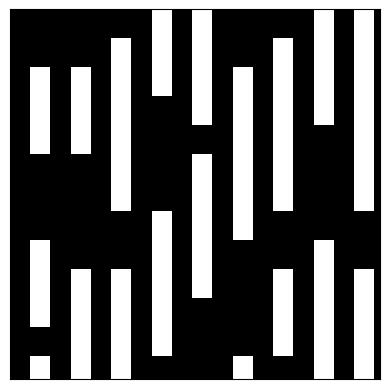

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

if sc.is_high_na:
    plt.imshow(mask[::-1, :].T, cmap='gray', interpolation='nearest')
else:
    plt.imshow(mask, cmap='gray', interpolation='nearest')
# plt.title("Mask")
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:

from elitho.intensity import intensity
from elitho import const

x_intensity_map = intensity(
    mask, 
    const.PolarizationDirection.X, 
    const.IlluminationType.DIPOLE_Y, 
    is_high_na=const.is_high_na,
)

In [7]:
x_intensity_map.min(), x_intensity_map.max()

(np.float64(0.010598114051757654), np.float64(0.41678822138294325))

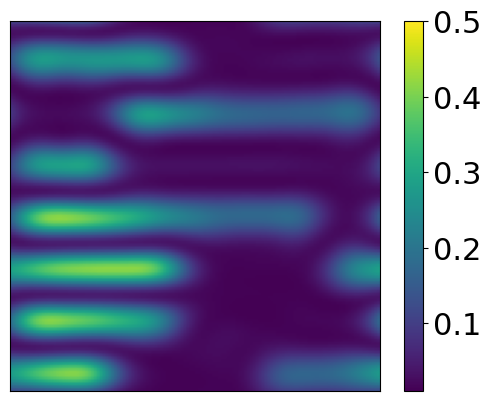

In [9]:
from matplotlib import pyplot as plt

if const.is_high_na:
    plt.imshow(x_intensity_map[::-1].T, vmax=0.5)
else:
    plt.imshow(x_intensity_map.T, vmax=0.3)
    # plt.title("Dipole_Y Illumination, X Polarization")
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22) 
plt.xticks([])  # x軸
plt.yticks([])  # y軸

plt.show()

In [10]:

from elitho.intensity import intensity
from elitho import const

y_intensity_map = intensity(
    mask, 
    const.PolarizationDirection.Y, 
    const.IlluminationType.DIPOLE_Y, 
    is_high_na=const.is_high_na,
)

In [11]:
y_intensity_map.min(), y_intensity_map.max()

(np.float64(0.010686214663710579), np.float64(0.3473546844148634))

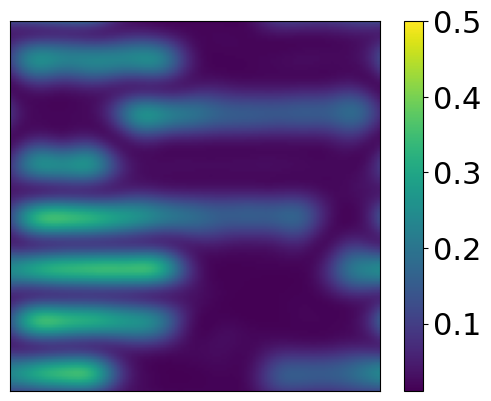

In [ ]:
from matplotlib import pyplot as plt
if const.is_high_na:
    plt.imshow(y_intensity_map[::-1].T, vmax=0.5) 
else:
    plt.imshow(y_intensity_map.T, vmax=0.3)

# plt.title("Dipole_Y Illumination, Y Polarization")
plt.xticks([])  # x軸
plt.yticks([])  # y軸

cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=22) 
plt.show()

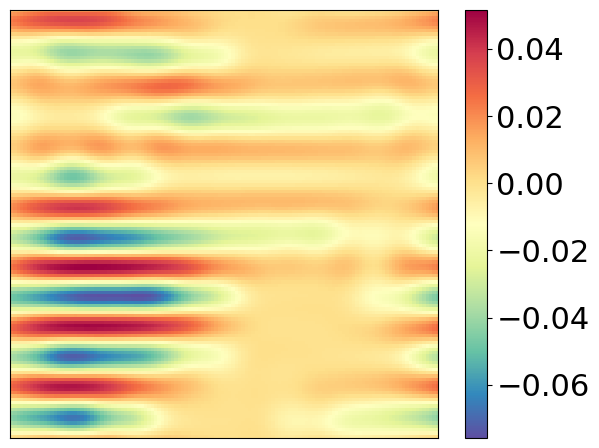

In [14]:
# diff
from matplotlib import pyplot as plt


diff_map = y_intensity_map - x_intensity_map
diff_map = diff_map[::-1].T
# vmin=-0.05
# vmax=0.05

if not const.is_high_na:
    high_na_diff_map = np.load("scaled_diff_map.npy")
    high_na_diff_map
    plt.imshow(diff_map, cmap="Spectral_r", vmin=high_na_diff_map.min(), vmax=high_na_diff_map.max())
else:
    plt.imshow(diff_map, cmap="Spectral_r")
# plt.title("Dipole_Y, difference")
# plt.colorbar(label="Pixel value", ticks=[diff_map.min(), diff_map.max()])
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=22) 
# ticks = list(cbar.get_ticks())
# ticks = sorted(set(ticks + [diff_map.min().round(2), diff_map.max().round(2)]))
# cbar.set_ticks(ticks)
# labels = [f"{t:.2f}" for t in ticks]
# cbar.set_ticklabels(labels)
plt.xticks([])  # x軸
plt.yticks([])  # y軸
plt.tight_layout()
plt.show()

In [ ]:
if const.is_high_na:
    np.save("scaled_diff_map.npy", diff_map)

In [ ]:
diff_map.min(), diff_map.max()

In [ ]:
# # 時間計測
# from elitho.intensity import intensity
# import cProfile, pstats

# profiler = cProfile.Profile()
# profiler.enable()
# # --- ここに計測したい処理 ---
# intensity_map = intensity(
#     mask, 
#     const.PolarizationDirection.X, 
#     const.IlluminationType.DIPOLE_Y, 
#     is_high_na=const.is_high_na,
# )
# profiler.disable()

# stats = pstats.Stats(profiler)
# stats.sort_stats('cumtime')  # 累積時間順にソート
# stats.print_stats(10)         # 上位10関数を表示

In [ ]:

from elitho.intensity import intensity
from elitho import const

intensity_map = intensity(
    mask, 
    const.PolarizationDirection.X, 
    const.IlluminationType.DIPOLE_Y, 
    is_high_na=const.is_high_na,
)

In [ ]:
# Dipole_Y
from matplotlib import pyplot as plt
plt.imshow(intensity_map)
plt.title("Dipole_Y, X polarization")
plt.colorbar(label="Pixel value")
plt.show()

In [ ]:

from elitho.intensity import intensity
from elitho import const

y_polar_intensity_map = intensity(
    mask, 
    const.PolarizationDirection.Y, 
    const.IlluminationType.DIPOLE_Y, 
    is_high_na=const.is_high_na,
)

In [ ]:
# Dipole_Y
from matplotlib import pyplot as plt
plt.imshow(y_polar_intensity_map)
plt.title("Dipole_Y, Y polarization")
plt.colorbar(label="Pixel value")
plt.show()

In [ ]:
# diff
from matplotlib import pyplot as plt
plt.imshow(y_polar_intensity_map - intensity_map, cmap="Spectral_r")
plt.title("Dipole_Y, difference")
plt.colorbar(label="Pixel value")
plt.show()

In [ ]:
# # diff
# from matplotlib import pyplot as plt
# a = np.zeros((100, 100), dtype  =int)
# a[0, 0] = 50
# a[50, 50] = 100
# plt.imshow(a, cmap='Spectral_r')
# plt.title("test")
# plt.colorbar(label="Pixel value")
# plt.show()